<a href="https://colab.research.google.com/github/wldhksqk/simjiwan1/blob/main/%EC%8B%AC%EC%A7%80%EC%99%845%EA%B0%956%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

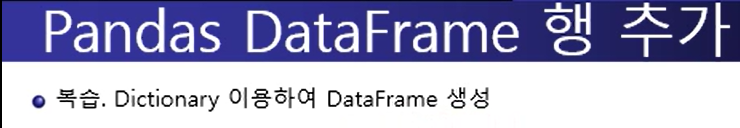

In [4]:
import pandas as pd

In [5]:
data = {'age': [23, 27, 31, 17], 'name' : ['민준', '현우', '서현', '동현'], 'height' : [170.5, 175.7, 159.9, 163.2] }
x = pd.DataFrame(data, columns=['name', 'age', 'height'])
x

,name,age,height
0,민준,23,170.5
1,현우,27,175.7
2,서현,31,159.9
3,동현,17,163.2


**(복습)**

**ㆍpandas Series 생성과 비슷하지만 다른점은 columns 를 정해준다는 점이 있다.**

**ㆍDictionary의 key와 columns의 이름은 같아야 한다!**

# **ㆍloc(행 번호) 이용해서 추가하기**

In [6]:
x.loc[4] = ['광현', 22, 176.2] #0~3행까지 있었으니까 4행으로 추가한다.
x

,name,age,height
0,민준,23,170.5
1,현우,27,175.7
2,서현,31,159.9
3,동현,17,163.2
4,광현,22,176.2


# **ㆍappend() 이용하기**

x = pd.DataFrame(data, columns=['name', 'age', 'height'])


달라보이지만 age, name, height 적은 부분이 **data**, 라고 보면됨

In [9]:
y = pd.DataFrame({'age': [24], 'name': ['철수'], 'height': [180] }, columns=['name', 'age', 'height'])
y #향식은 같다. data, columns 형식

,name,age,height
0,철수,24,180


In [13]:
result = x.append(y) #result는 결과
result

,name,age,height
0,민준,23,170.5
1,현우,27,175.7
2,서현,31,159.9
3,동현,17,163.2
4,광현,22,176.2
0,철수,24,180.0


이 과정에서 index 번호 0가 두 번 나온다. 민준, 철수

# 이를 해결하기 위해 **ignore_index=true**를 추가

입력된 인덱스를 무시하면 알아서 마지막 행에 추가해버린다.

In [15]:
result = x.append(y, ignore_index=True)
result

,name,age,height
0,민준,23,170.5
1,현우,27,175.7
2,서현,31,159.9
3,동현,17,163.2
4,광현,22,176.2
5,철수,24,180.0


# **참고!**, result = x.append(y)를 하면 x의 값은 변하는가?

변하지 않는다

원하는 data에 계속 행을 추가하고 싶으면

x=x.append(y)를 해야한다. 재할당한다.

위 문자들의 뜻은 기존x에 y를 추가한 것을 다시 x로 할당하는 것

In [16]:
x=x.append(y, ignore_index=True)
x

,name,age,height
0,민준,23,170.5
1,현우,27,175.7
2,서현,31,159.9
3,동현,17,163.2
4,광현,22,176.2
5,철수,24,180.0


# **ㆍconcat() 활용하기**

x와 y를 합치는 것

In [18]:
result = pd.concat([x, y], ignore_index=True)
result #ignore_index의 용법은 이전과 동일하다

,name,age,height
0,민준,23,170.5
1,현우,27,175.7
2,서현,31,159.9
3,동현,17,163.2
4,광현,22,176.2
5,철수,24,180.0
6,철수,24,180.0


# **Missing value 표현**

**NaN은 데이터들에서 예상치 못한 값을 나타낸다.**

NaN: not-a-number

**numpy module안에 missing value를 나타내는 NaN이 정의 되어 있다**

NaN을 포함하고 있는 테이블은 다음과 같다

In [19]:
import numpy as np

In [23]:
df=pd.DataFrame(np.random.randn(5,5))  
df.columns=['A','B','C','D','E'] #5 by 5를 A, B, C, D, E로 구분해준거임 그냥
df.iloc[1,1]=np.nan # 1,1 위치에 NaN을 넣는다
df.iloc[2,2]=np.nan # 2,2 위치에 NaN을 넣는다, 3,4에 넣는다면?
df.iloc[3,4]=np.nan
df

,A,B,C,D,E
0,-0.261567,0.481499,-0.217645,-1.657866,-1.566438
1,0.874776,NaN,-0.652154,1.385869,-0.219105
2,-0.211294,0.784413,NaN,0.452302,0.703316
3,-0.092733,0.309428,-0.921408,-0.148897,NaN
4,0.574969,0.115632,-0.169711,-0.819085,-1.327156


# **NaN 찾기**

# **isnull()**

**df.isnull()**해보기

In [24]:
df.isnull() #값이 의미가 있는 것들은 null이 아니니까 다 False가 된다
#null이 없다는 뜻, NaN이 있는 위치에서 True를 반환한다

,A,B,C,D,E
0,False,False,False,False,False
1,False,True,False,False,False
2,False,False,True,False,False
3,False,False,False,False,True
4,False,False,False,False,False


isnull('A')

df['A'].isnull()

A행에서의 Ture, False를 나타냄

In [25]:
df['A'].isnull()

0    False
1    False
2    False
3    False
4    False
Name: A, dtype: bool

In [26]:
df['E'].isnull()

0    False
1    False
2    False
3     True
4    False
Name: E, dtype: bool

# **B행에서 NaN이 있는 행만 나타내려면?**

**df['B'].isnull()을 df한에 넣는다.**

**즉, df[df['B'].isnull()]**

In [27]:
df[df['B'].isnull()]

,A,B,C,D,E
1,0.874776,NaN,-0.652154,1.385869,-0.219105


In [28]:
df[df['E'].isnull()] #E에서 NaN이 있느 행 3행임

,A,B,C,D,E
3,-0.092733,0.309428,-0.921408,-0.148897,NaN


# **NaN이 얼마나 있는지 확인하기**

**isnull().sum()**을 이용!

True의 수를 세어 준다.

In [29]:
df.isnull().sum()

A    0
B    1
C    1
D    0
E    1
dtype: int64

In [30]:
df['E'].isnull().sum()

1

# **NaN값 채우기**

**알고리즘을 이용한 data 분석전에 NaN을 숫자로 바꾸는 것이 보통 선행된다**

**NaN을 0으로 바꾸기, 평균을 바꾸기, 행을 없애기 등**

# **dropna()**

**NaN이 있는 행을 삭제하는 명령어임.**

In [31]:
df.dropna() #df자체를 건드린 건 아니고 없앤걸 출력만 했음 

,A,B,C,D,E
0,-0.261567,0.481499,-0.217645,-1.657866,-1.566438
4,0.574969,0.115632,-0.169711,-0.819085,-1.327156


**다시 df를 출력하면 1,2행이 없어져 있지 않다**
**왜? df.dropna()를 실행하면 df자체를 변화시키는 것이 아니라**,  **NaN이 없어진 값을 출력하는 것이기 때문**

# df자체를 변화시키고 싶으면 **inplace=True**를 넣어줘야함

In [33]:
df.dropna(inplace=True)
df

,A,B,C,D,E
0,-0.261567,0.481499,-0.217645,-1.657866,-1.566438
4,0.574969,0.115632,-0.169711,-0.819085,-1.327156


# B열에서 NaN이 있는 경우만 행을 삭제하고 싶은 경우는 **subset**을 사용

**axis=0는 행을 삭제한다는 뜻!**

**axis=1은 열을 삭제!**

In [ ]:
df=pd.DataFrame(np.random.randn(5,5))  
df.columns=['A','B','C','D','E'] 
df.iloc[1,1]=np.nan 
df.iloc[2,2]=np.nan 
df.iloc[3,4]=np.nan
df

In [38]:
df.dropna(subset=['B'], axis=0, inplace=True) #axis=0는 행삭제
df

,A,B,C,D,E
0,-1.342377,-0.488596,-2.095107,0.540027,-0.488797
2,-0.618378,-1.449633,NaN,0.004794,0.457185
3,-0.582289,0.311298,0.569924,-1.347150,NaN
4,-0.764050,-1.012496,-0.486284,-0.620318,-0.149746


In [ ]:
df=pd.DataFrame(np.random.randn(5,5))  
df.columns=['A','B','C','D','E'] 
df.iloc[1,1]=np.nan 
df.iloc[2,2]=np.nan 
df.iloc[3,4]=np.nan
df

In [43]:
df.dropna(axis=1, inplace=True) #axis=1은 열삭제 B, C, E가 삭제 됨
df

,A,D
0,-0.388394,0.059854
1,-0.753901,-0.768014
2,-0.203001,0.635078
3,-0.631811,-2.260861
4,0.780789,0.851404


# **NaN값을 0으로 바꾸는 방법도 있음**

# **replace()기능 활용**

**다른데이터가 의미 있을 수 있는데 nan이 있다고 없애버릴 수는 없는 노릇이기에 이것을 활용할 때가 있다**

In [46]:
robots = [[24, 23680], [35, np.nan], [46, 47350], [27, np.nan]]
data= pd.DataFrame(robots, columns=['max_spped', 'price']) #spped 스피드라고 함
data

,max_spped,price
0,24,23680.0
1,35,NaN
2,46,47350.0
3,27,NaN


In [51]:
data.replace(np.nan, 0, inplace=True)
data

,max_spped,price
0,24,23680.0
1,35,0.0
2,46,47350.0
3,27,0.0


# **NaN값을 평균으로 바꾸기**

**replace()사용**

**미리, price열의 평균을 구하고 바꾼다.**

**주의 : inplace+True를 사용하지 않으면 data가 안바뀐다!**

In [ ]:
robots = [[24, 23680], [35, np.nan], [46, 47350], [27, np.nan]]
data= pd.DataFrame(robots, columns=['max_spped', 'price']) #spped 스피드라고 함
data

In [54]:
mean = data['price'].mean() #price를 평균낸 것, 평균을 낼때 NaN을 무시하고 평균내준다. 걱정ㄴ
data.replace(np.nan, mean, inplace=True)
data

,max_spped,price
0,24,23680.0
1,35,35515.0
2,46,47350.0
3,27,35515.0


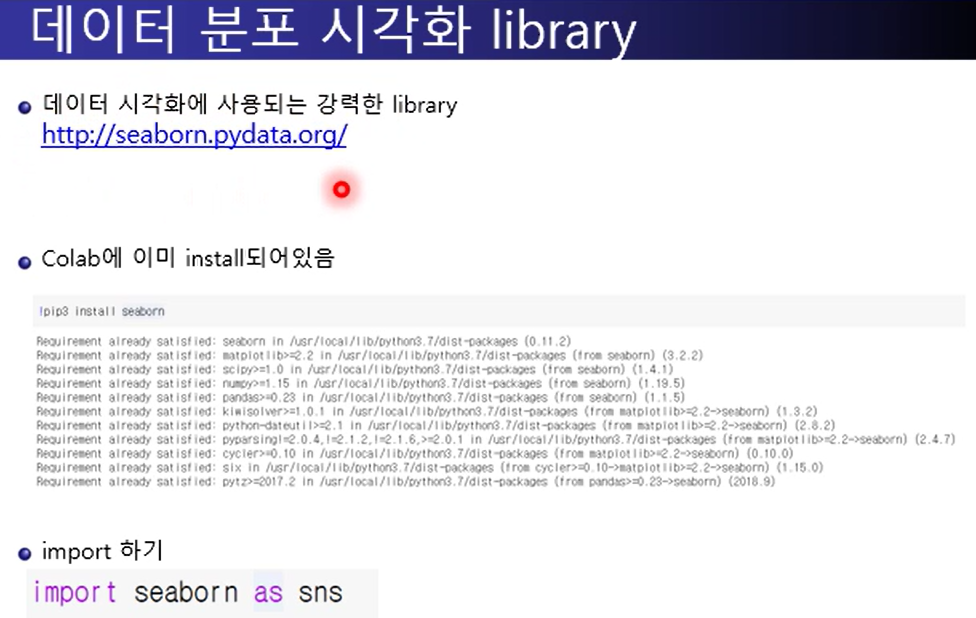

In [55]:
import seaborn as sns

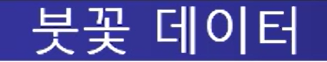

In [60]:
iris = sns.load_dataset("iris") #seaborn에서 데이터셋을 로드하겠다 → 아이리스
iris.head(11)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


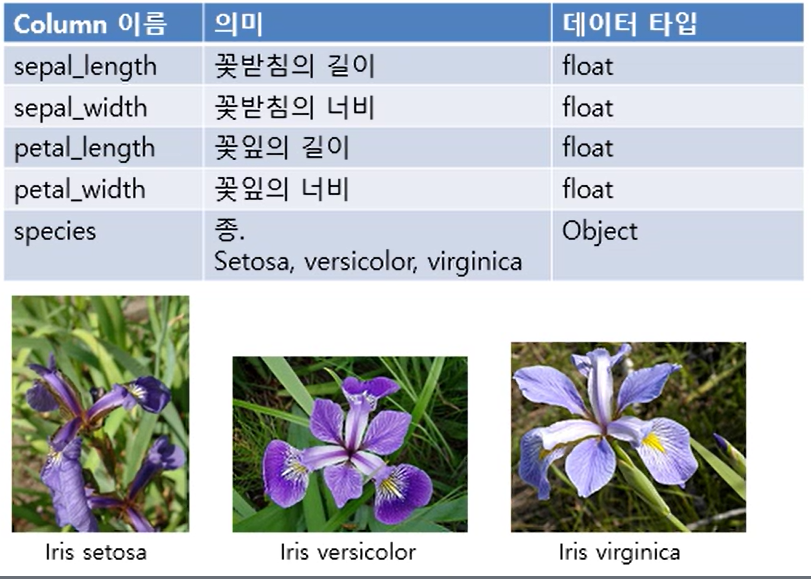

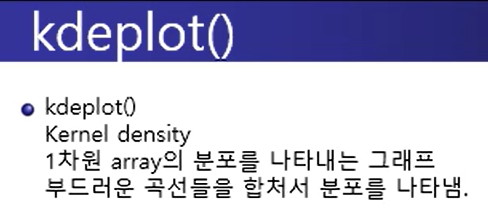

# 많은 양의 데이터를 보고 그 생김새를 구분해볼 수 있는 것이 kdeplot의 특징

# 데이터를 육안으로 확인하기 용이하게 가시화

In [64]:
import matplotlib.pyplot as plt


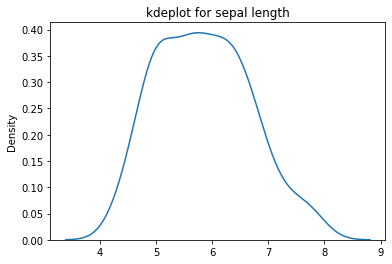

In [70]:
vals = iris['sepal_length'].values #아까 열은 데이터프레임 중에 sepal_lengthf에 있는 값들만 vals에 저장하겠다. 꽃받침 길이
sns.kdeplot(vals)
plt.title("kdeplot for sepal length") 
plt.show() #아랫면적을 다 적분하면 1이 된다. density가 

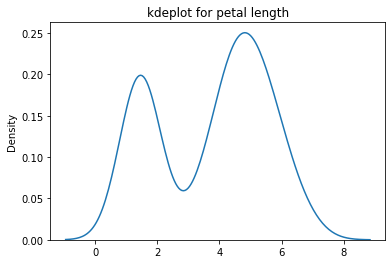

In [74]:
vals = iris['petal_length'].values #꽃잎 길이
sns.kdeplot(vals)
plt.title("kdeplot for petal length") 
plt.show()

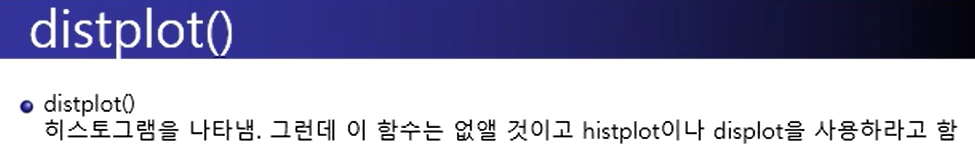

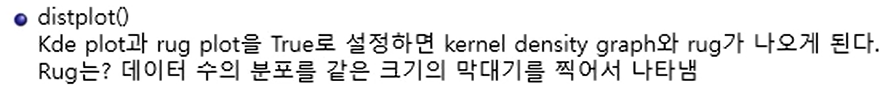

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


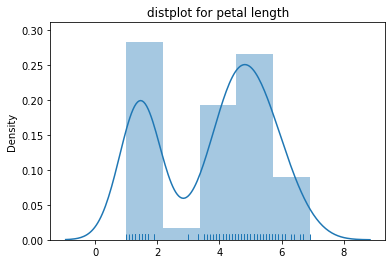

In [76]:
vals = iris['petal_length'].values
sns.distplot(vals, kde=True, rug=True) #히스토그램도 같이 보여준다, 아래에 잔디, 카페트마냥 난거 = rug
plt.title("distplot for petal length")
plt.show()

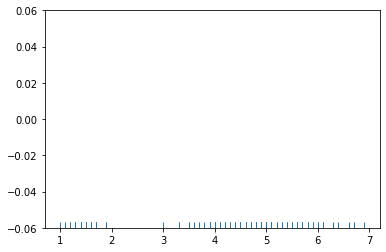

In [78]:
sns.rugplot(vals)

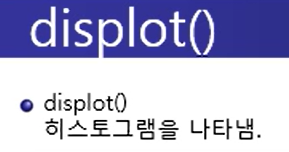

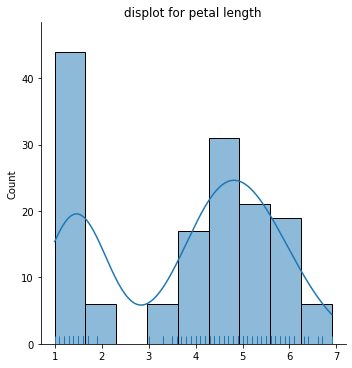

In [77]:
sns.displot(vals, kde=True, rug=True) #distplot()이랑 비교해보기 확연하게 히스토그램이 선명함
plt.title("displot for petal length") #distplot에서 의미없어 보이는 것을 버린 것 ex)사이드 곡선들
plt.show()

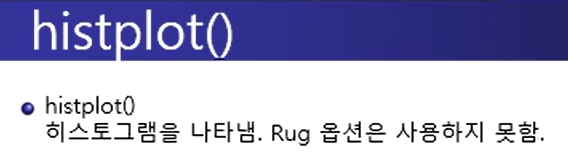

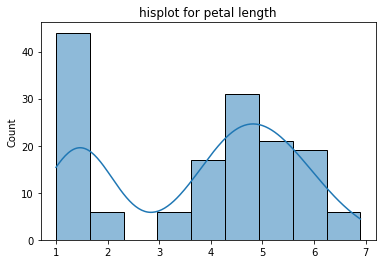

In [80]:
sns.histplot(vals, kde=True) #rug빠짐
plt.title("hisplot for petal length")
plt.show()

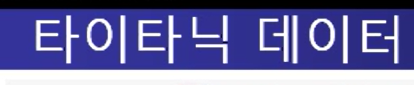

In [82]:
titanic = sns.load_dataset("titanic") #타이타닉호 데이터
titanic.tail(7) #생존자, 티켓등급 성별 나이 티켓가격 직계가족 등등

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
884,0,3,male,25.0,0,0,7.050,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True


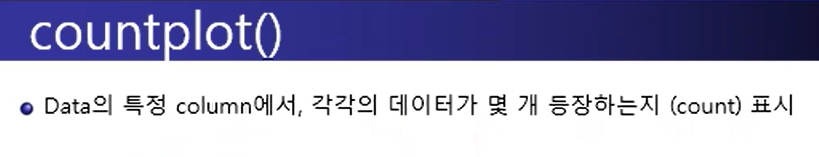

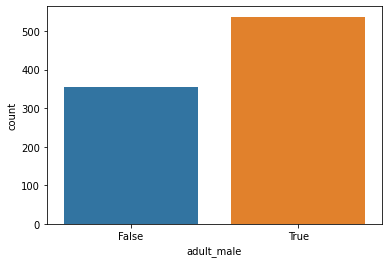

In [83]:
sns.countplot(x='adult_male', data=titanic)
plt.show()

In [86]:
titanic.adult_male

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: adult_male, Length: 891, dtype: bool

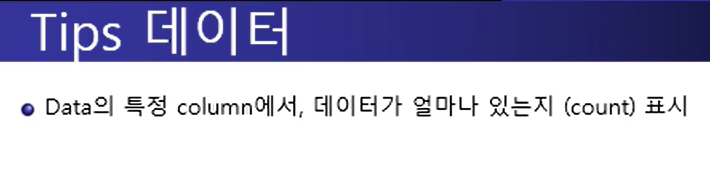

In [88]:
tips = sns.load_dataset("tips") #팁 데이터
tips.head(7) 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2


2번 사람은 팁을 약16.5% 팁은 10~20%가량이니까 나름 만족한 듯?

6번 사람의 팁퍼센트는 22.81%로 높은 수치지만 가격을 고려헀을 때

5번 사람의 팁 18.62%가 조금 더 의미가 있는 듯

재미로 한 번 해보기


In [107]:
a = 21.02
b = 3.50
c = "%.2f%%" %(b/a *100) # 전체값에서 일부값은 몇 퍼센트? 계산
                        # 공식은 "일부값 나누기 전체값 곱하기 100.0"  
print(c) 

16.65%


In [110]:
a = 25.29
b = 4.71
c = "%.2f%%" %(b/a *100) 
print(c)

18.62%


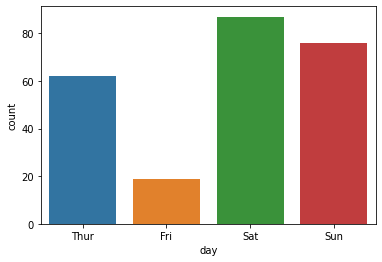

In [89]:
sns.countplot(x="day", data=tips) #요일별 손님 분석
plt.show()

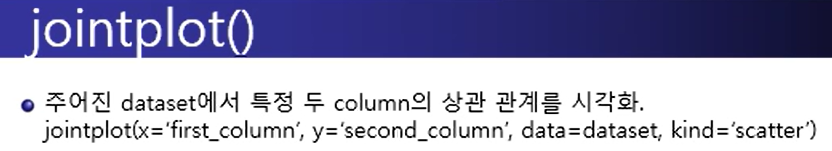

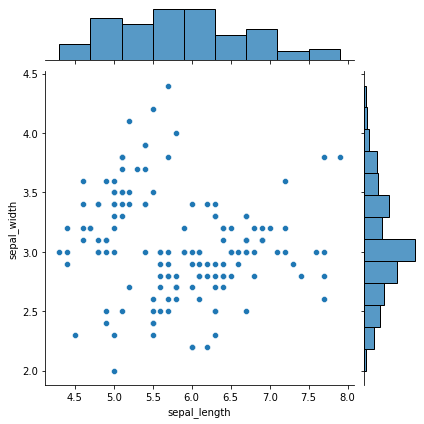

In [111]:
sns.jointplot(x='sepal_length', y="sepal_width", data=iris, kind='scatter')
plt.show() #각각의 히스토그램도 그려준다!

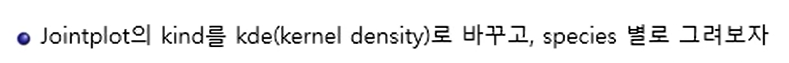

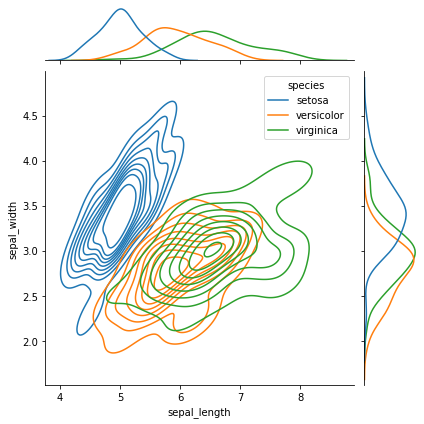

In [113]:
sns.jointplot(x='sepal_length', y="sepal_width", data=iris, hue='species', kind='kde')
plt.show() #등고선형태로 분포 #species=종, 종별로

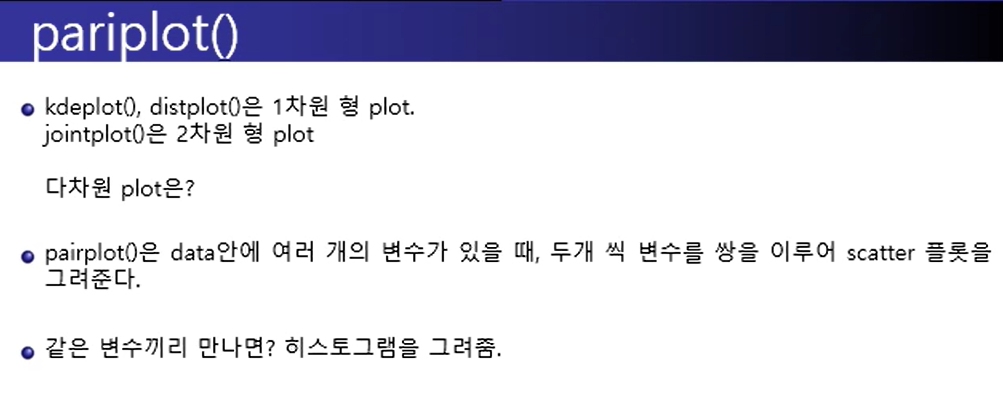

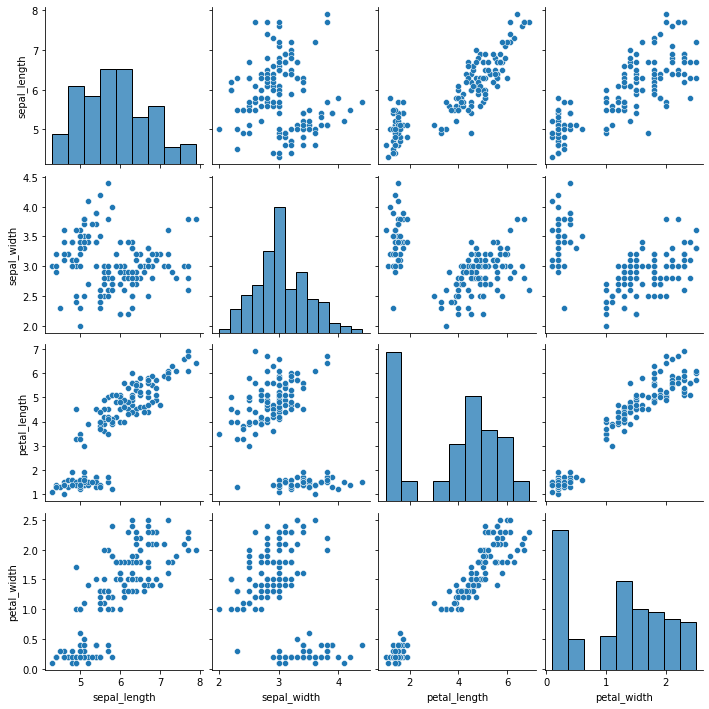

In [114]:
sns.pairplot(iris) #아까는 하나하나 했지만 이건 다 나와서 보고 비교가 바로바로 됨 #대칭형태로 되어있음
plt.show()

# 특정한 column이 카테고리형 데이터라면, 색상을 지정해서 표현해 줄 수도 있다.

# 예)species 종, 종들

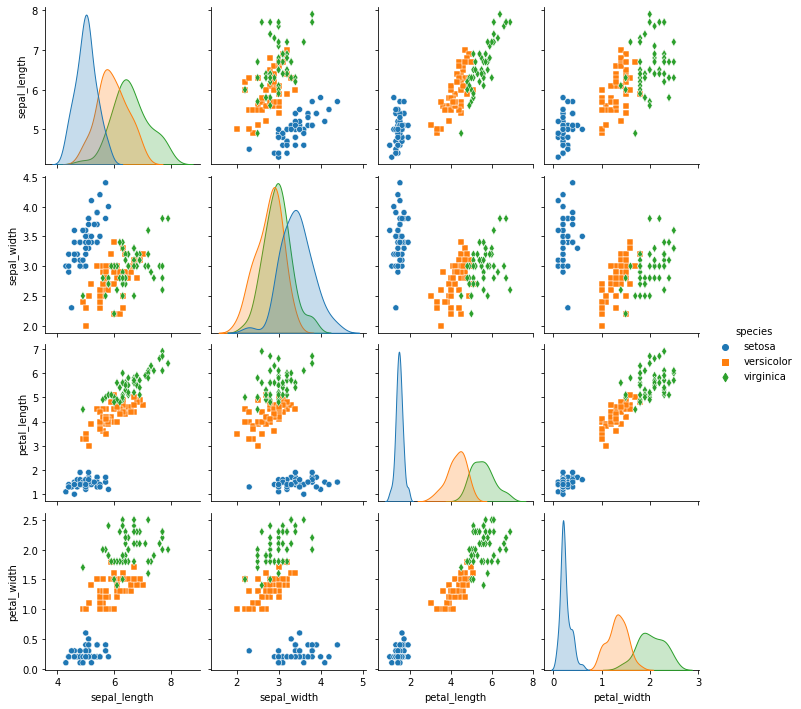

In [117]:
sns.pairplot(iris, hue='species', markers=['o', 's', 'd'])
plt.show()

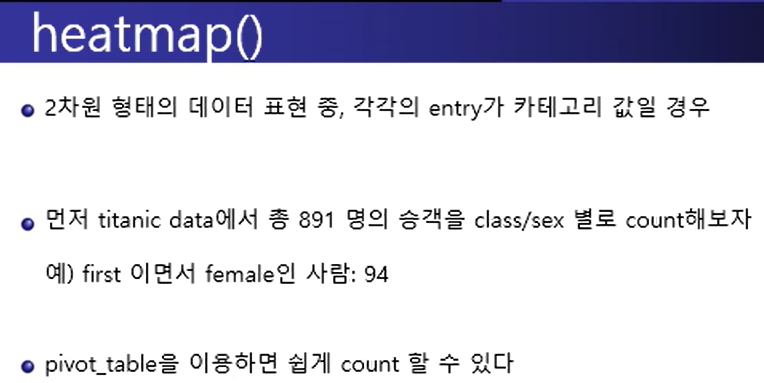

In [118]:
titanic_size = titanic.pivot_table(index="class", columns='sex', aggfunc='size') #피벗 테이블
titanic_size #성별은 오른쪽 클래스는 아래로 구분

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


# **ㆍ**방금 만든 타이타닉 사이즈를 **heatmap**에 넣어서 시각화!

# **ㆍ**option에서 annot=True를 하면, 숫자가 박스 위에 나온다

#**ㆍ**fmt='d'를하면, 정수형으로 보여준다.

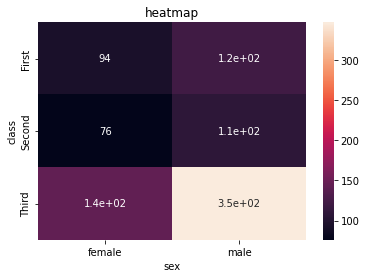

In [120]:
sns.heatmap(titanic_size,)
plt.title('heatmap')
plt.show()

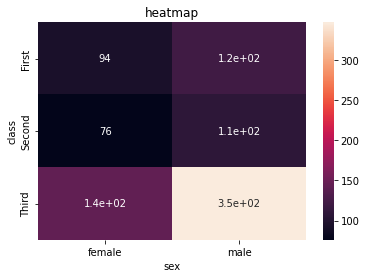

In [121]:
sns.heatmap(titanic_size, annot=True)
plt.title('heatmap')
plt.show()

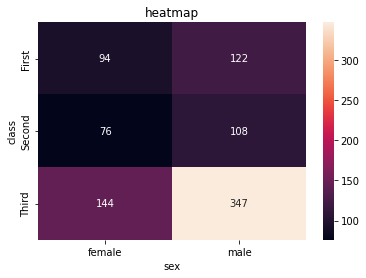

In [122]:
sns.heatmap(titanic_size, annot=True, fmt='d') #정수값으로 써야하는 그런건 아닌데 그냥 보기편하라고
plt.title('heatmap')
plt.show()

# **ㆍ**Colormap을 바꿀 수 있다


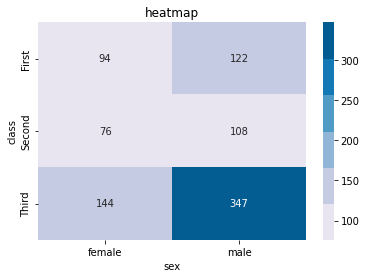

In [123]:
sns.heatmap(titanic_size, cmap=sns.color_palette("PuBu"), annot=True, fmt='d')
plt.title('heatmap')
plt.show()

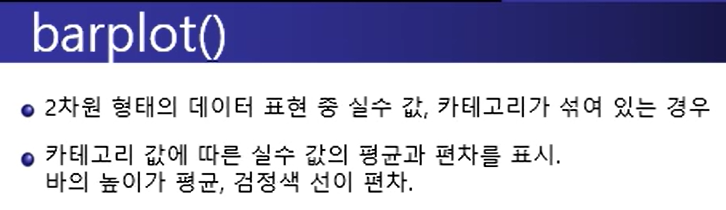

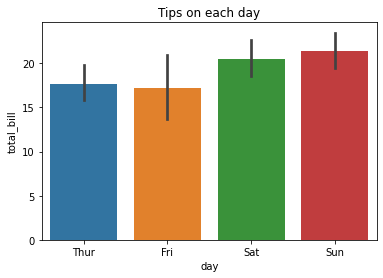

In [124]:
sns.barplot(x='day', y='total_bill', data=tips)
plt.title("Tips on each day")
plt.show()

# x, y위치 바꿀 수도 있다. 

# 항상 카테고리 형 변수에 대한 다른 변수의 평균과 편차값이 그려진다.

# 요일(Fri, Set 등등)같은 경우 실수로 표현할 순 없지만 실수값으로 표현할 수 있는 걸 찾아서 표현한다

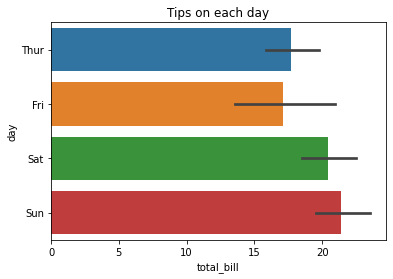

In [126]:
sns.barplot(x='total_bill', y='day', data=tips) 
plt.title("Tips on each day")
plt.show()

ㄴ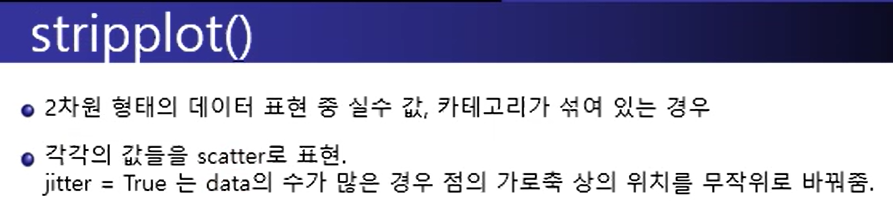

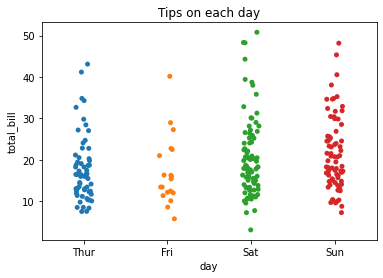

In [128]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True) #지터가 있을 때 가시성이 더 좋다.
plt.title('Tips on each day')
plt.show()

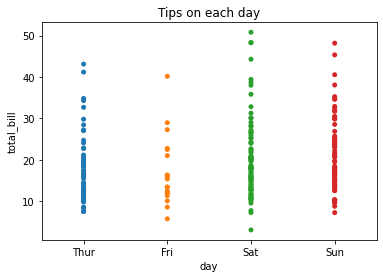

In [129]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=False) #지터가 없을 때 가시성이 안좋다.
plt.title('Tips on each day')
plt.show()

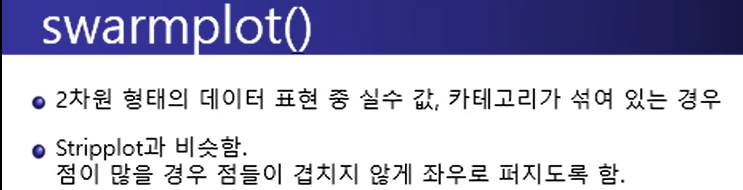

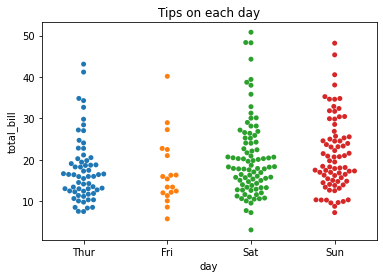

In [130]:
sns.swarmplot(x='day', y='total_bill', data=tips) #좀 더 명확하게 좌우로 퍼트림
plt.title('Tips on each day')
plt.show()

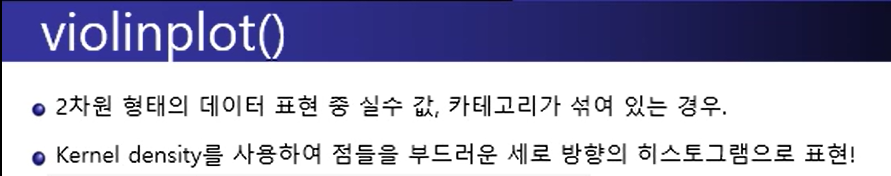

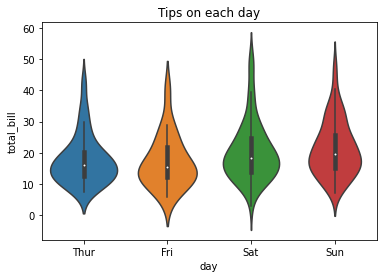

In [131]:
sns.violinplot(x='day', y='total_bill', data=tips) #결국 다 같은거지만 얘는 바이올린처럼 생김
plt.title('Tips on each day')
plt.show() #이 때 히스토그램이 좌우 대칭으로 나타난다.

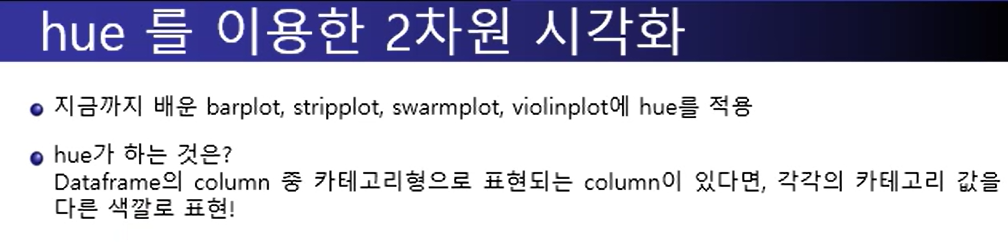

# **ㆍ**barplot에 hue옵션 적용하기



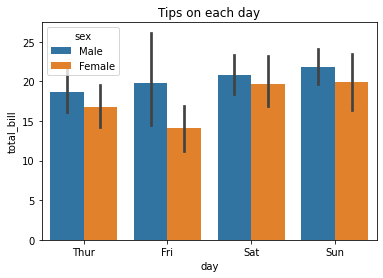

In [132]:
sns.barplot(x='day', y='total_bill', hue='sex', data=tips) #섞이지 않고 남성과 여성 분리
plt.title('Tips on each day with hue=sex')
plt.show()

# **ㆍ**stripplot에 hue옵션 적용하기

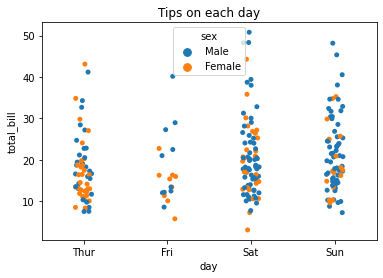

In [133]:
sns.stripplot(x='day', y='total_bill', hue='sex', data=tips)
plt.title('Tips on each day with hue=sex')
plt.show()

# **ㆍ**swarmplot에 hue옵션 적용하기

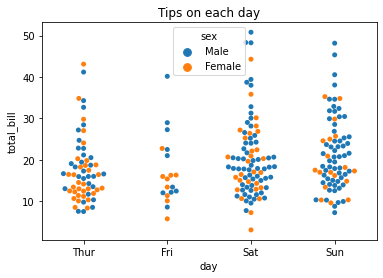

In [135]:
sns.swarmplot(x='day', y='total_bill', hue='sex', data=tips)
plt.title('Tips on each day with hue=sex')
plt.show()

# **ㆍ**violinplott에 hue옵션 적용하기

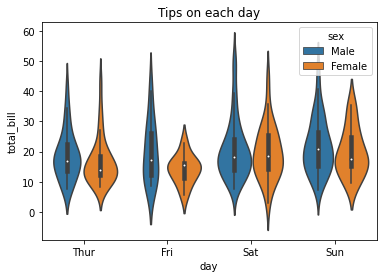

In [136]:
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips) #애도 섞어놓을 순 없고 남성과 여성 분리해서 나타냄
plt.title('Tips on each day with hue=sex')
plt.show()

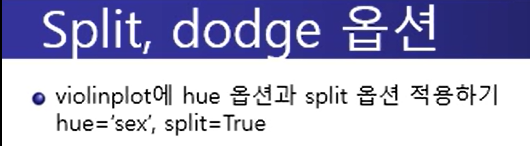

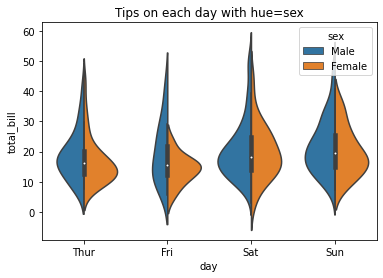

In [137]:
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, split=True)  #split 두개의 카테고리에 대해 양쪽으로 그려줌
plt.title('Tips on each day with hue=sex and split=True')
plt.show()

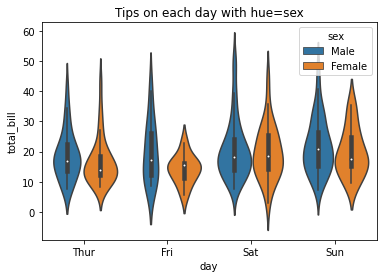

In [141]:
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, dodge=True)  #dodge 두개를 나눠서
plt.title('Tips on each day with hue=sex and split=True')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


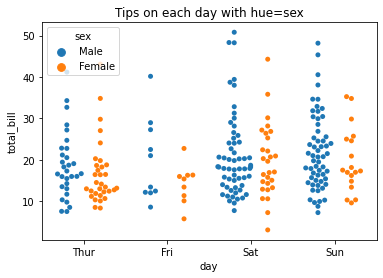

In [140]:
sns.swarmplot(x='day', y='total_bill', hue='sex', data=tips, dodge=True) #swarmplot에도 가능
plt.title('Tips on each day with hue=sex and split=True')
plt.show()

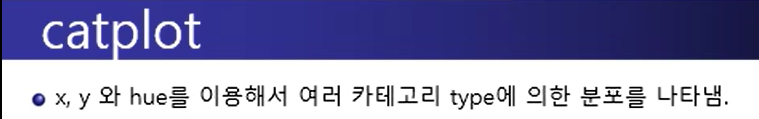

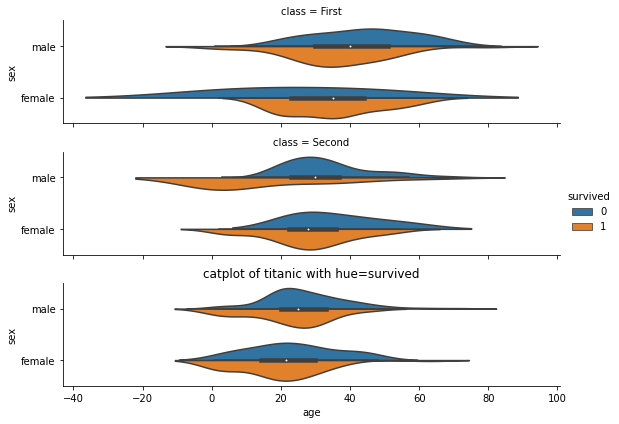

In [145]:
sns.catplot(x='age', y='sex', hue='survived', row='class', data=titanic, kind='violin', split=True, height=2, aspect=4)
plt.title('catplot of titanic with hue=survived')
plt.show()

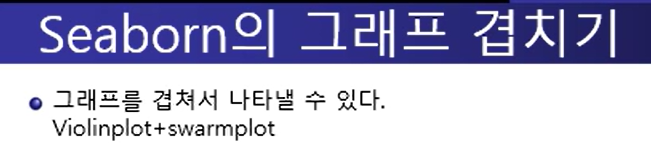

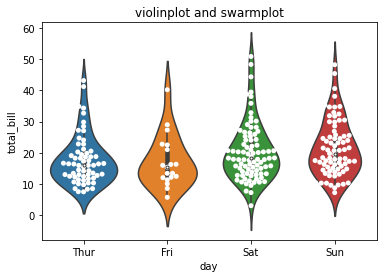

In [148]:
plt.title('violinplot and swarmplot')
sns.swarmplot(x='day', y='total_bill', data=tips, color='w') #얘가 점이니까 가시성 있게 컬러 조정
sns.violinplot(x='day', y='total_bill', data=tips,)
plt.show()